In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import pylab
from sklearn import linear_model
style.use('ggplot')

In [2]:
# Name of the CSV file
file = 'Airbnb_Austin_Data_Finalized.csv'
Airbnb_Austin_df = pd.read_csv(file)

In [3]:
Airbnb_Austin_df.head()

,summary,zipcode,property_type,accommodates,bedrooms,bathrooms,beds,amenities,square_feet,price,availability_365,cancellation_policy,review_scores_rating,review_scores_value,description,instant_bookable,host_verifications
0,Conveniently located 10-15 from downtown in SW...,78749.0,House,6,1.0,2.5,3.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",3600.0,300.0,240,moderate,100.0,10.0,Conveniently located 10-15 from downtown in SW...,f,"['email', 'facebook', 'linkedin', 'reviews']"
1,Rent this cool concept trailer that has everyt...,78739.0,Camper/RV,2,1.0,0.0,1.0,"{""Air Conditioning"",Heating,""Family/Kid Friend...",NaN,99.0,364,moderate,NaN,NaN,Rent this cool concept trailer that has everyt...,f,"['email', 'phone', 'google', 'kba']"
2,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",78739.0,House,2,1.0,1.5,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,100.0,365,flexible,NaN,NaN,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",f,"['email', 'phone', 'linkedin', 'jumio']"
3,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",78739.0,House,2,1.0,1.5,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,100.0,365,flexible,NaN,NaN,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",f,"['email', 'phone', 'linkedin', 'jumio']"
4,Brand-new 3BR/2BA Austin home with landscaped ...,78739.0,House,6,3.0,2.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,599.0,358,strict,NaN,NaN,Brand-new 3BR/2BA Austin home with landscaped ...,f,"['email', 'phone', 'linkedin', 'reviews', 'jum..."


In [4]:
Airbnb_Austin_df.columns

Index(['summary', 'zipcode', 'property_type', 'accommodates', 'bedrooms',
       'bathrooms', 'beds', 'amenities', 'square_feet', 'price',
       'availability_365', 'cancellation_policy', 'review_scores_rating',
       'review_scores_value', 'description', 'instant_bookable',
       'host_verifications'],
      dtype='object')

In [5]:
Cancellations_DF = Airbnb_Austin_df.groupby("cancellation_policy").mean()

In [6]:
Cancellations_DF.head()

,zipcode,accommodates,bedrooms,bathrooms,beds,square_feet,price,availability_365,review_scores_rating,review_scores_value
cancellation_policy,,,,,,,,,,
flexible,78724.491415,3.673299,1.469907,1.348499,1.783116,1199.804878,258.847756,263.730680,95.220165,9.452012
moderate,78720.968134,4.057576,1.588636,1.389058,1.988628,1251.011364,220.286364,260.266667,95.830474,9.472138
no_refunds,78704.000000,6.000000,2.000000,1.000000,4.000000,922.000000,350.000000,365.000000,79.000000,6.000000
strict,78696.923507,5.229522,2.072253,1.652295,2.728516,1375.852941,348.231655,280.277730,95.332599,9.367899
super_strict_30,78740.666667,5.222222,1.555556,1.111111,2.888889,700.000000,346.666667,346.111111,97.888889,9.500000


In [7]:
x_Cancel = Cancellations_DF.index
y_Price = Cancellations_DF['price']

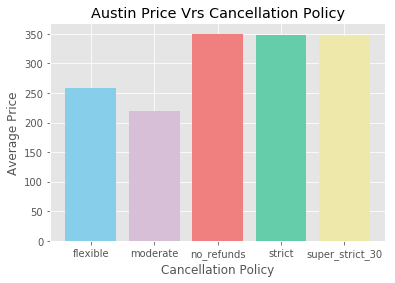

In [8]:
colors = ["skyblue","thistle","lightcoral","mediumaquamarine","palegoldenrod","rosybrown"]
plt.bar(x_Cancel, y_Price, color = colors, align="center")
plt.title("Austin Price Vrs Cancellation Policy")
plt.xlabel("Cancellation Policy")
plt.ylabel("Average Price")
plt.savefig("Austin_Cancellation_BarChart.png")
plt.show()

In [9]:
Count_Cancellations_DF = Airbnb_Austin_df.groupby("cancellation_policy").count()
Count_Cancellations_DF

,summary,zipcode,property_type,accommodates,bedrooms,bathrooms,beds,amenities,square_feet,price,availability_365,review_scores_rating,review_scores_value,description,instant_bookable,host_verifications
cancellation_policy,,,,,,,,,,,,,,,,
flexible,2045,2155,2161,2161,2160,2132,2144,2161,41,2161,2161,972,969,2159,2161,2161
moderate,1217,1318,1320,1320,1320,1316,1319,1320,88,1320,1320,991,987,1320,1320,1320
no_refunds,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
strict,2102,2327,2344,2344,2339,2331,2339,2344,170,2344,2344,1816,1813,2343,2344,2344
super_strict_30,9,9,9,9,9,9,9,9,2,9,9,9,8,9,9,9


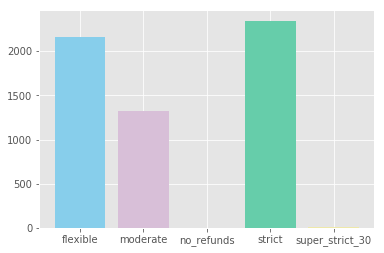

In [10]:
y_Count = Count_Cancellations_DF['price']
colors = ["skyblue","thistle","lightcoral","mediumaquamarine","palegoldenrod","rosybrown"]
plt.bar(x_Cancel, y_Count, color = colors, align="center")
plt.savefig("Austin_Cancellation_COUNT_BarChart.png")

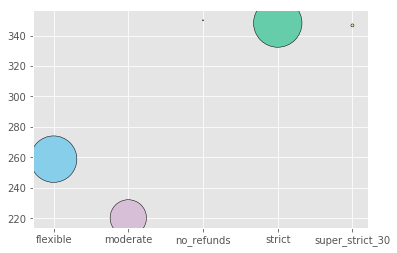

In [11]:
colors = ["skyblue","thistle","lightcoral","mediumaquamarine","palegoldenrod","rosybrown"]
plt.scatter(x_Cancel, y_Price, color = colors, s = y_Count, edgecolor = "black")
plt.savefig("Austin_Cancellation_BUBBLEChart.png")

In [ ]:
# Airbnb_Austin_df['Cancel_flex'] = Airbnb_Austin_df['cancellation_policy'].apply(lambda x: int(x=="flexible"))
# Airbnb_Austin_df['Cancel_moderate'] = Airbnb_Austin_df['cancellation_policy'].apply(lambda x: int(x=="moderate"))
# Airbnb_Austin_df['Cancel_strict'] = Airbnb_Austin_df['cancellation_policy'].apply(lambda x: int(x=="strict"))

In [12]:
Airbnb_Austin_df.head()

,summary,zipcode,property_type,accommodates,bedrooms,bathrooms,beds,amenities,square_feet,price,availability_365,cancellation_policy,review_scores_rating,review_scores_value,description,instant_bookable,host_verifications
0,Conveniently located 10-15 from downtown in SW...,78749.0,House,6,1.0,2.5,3.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",3600.0,300.0,240,moderate,100.0,10.0,Conveniently located 10-15 from downtown in SW...,f,"['email', 'facebook', 'linkedin', 'reviews']"
1,Rent this cool concept trailer that has everyt...,78739.0,Camper/RV,2,1.0,0.0,1.0,"{""Air Conditioning"",Heating,""Family/Kid Friend...",NaN,99.0,364,moderate,NaN,NaN,Rent this cool concept trailer that has everyt...,f,"['email', 'phone', 'google', 'kba']"
2,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",78739.0,House,2,1.0,1.5,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,100.0,365,flexible,NaN,NaN,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",f,"['email', 'phone', 'linkedin', 'jumio']"
3,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",78739.0,House,2,1.0,1.5,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,100.0,365,flexible,NaN,NaN,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",f,"['email', 'phone', 'linkedin', 'jumio']"
4,Brand-new 3BR/2BA Austin home with landscaped ...,78739.0,House,6,3.0,2.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,599.0,358,strict,NaN,NaN,Brand-new 3BR/2BA Austin home with landscaped ...,f,"['email', 'phone', 'linkedin', 'reviews', 'jum..."


In [ ]:
#.apply on a dataframe - need to specific row or columns
# #axis = 1, row, axis = 0 column
# def func(row):
#     if np.isnan(row["square_feet"]):
#         return 1
#     return row["square_feet"]
# Airbnb_Austin_df["test"] = Airbnb_Austin_df.apply(lambda row: func(row), axis=1)

In [ ]:
# Airbnb_Austin_df["test"].head()

In [13]:
cancelation_map = {
    "flexible": 0,
    "moderate": 1, 
    "strict":2, 
    "super_strict_30":3, 
    "no_refunds":4
}
Airbnb_Austin_df["cancelation_value"] = Airbnb_Austin_df["cancellation_policy"].apply(lambda x: cancelation_map[x])

In [14]:
#Airbnb_Austin_df_copy = Airbnb_Austin_df.dropna(subset=["zipcode","price","accommodates"])
Airbnb_Austin_df_copy = Airbnb_Austin_df.dropna(subset=["accommodates","price"])
#Airbnb_Austin_df_copy = Airbnb_Austin_df_copy[(Airbnb_Austin_df_copy["cancelation_value"]==1) | (Airbnb_Austin_df_copy["cancelation_value"]==2)]
# X = Airbnb_Austin_df_copy[["zipcode","price","accommodates"]]
X = Airbnb_Austin_df_copy[["accommodates","price"]]
Y = Airbnb_Austin_df_copy["cancelation_value"]
#X["zipcode"] = X["zipcode"].astype(int)

In [15]:
Airbnb_Austin_df_copy["cancelation_value"].value_counts()

2    2344
0    2161
1    1320
3       9
4       1
Name: cancelation_value, dtype: int64

In [16]:
#h = 2  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

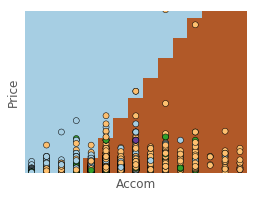

In [17]:
x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 25))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1],c = Y, edgecolors='black', cmap=plt.cm.Paired)
plt.xlabel('Accom')
plt.ylabel('Price')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
#plt.savefig("Austin_All5_Cancel_Policy.png")
plt.show()

In [ ]:
Airbnb_Austin_df_copy.head()